# 1. Getting Started with VIS

There are many ways to get started with VIS. If you are already familiar with Python just go ahead and pip install ```vis-framework``` from pypi, and use your favorite text editor (sublime, emacs, etc.) or IDE.

Everybody else can follow along online on our [http://visdemo.simssa.ca](http://visdemo.simssa.ca).

When using Python 2.7 we should declare the coding type first. (This is not necessary for Python 3 variants, and the code will be ignored by the Python 3 interpreter).

In [1]:
# -*- coding: utf-8 -*-

In [2]:
# Fun time with VIS.

In [3]:
# Testing our Python.
import sys # more on importing libraries later ...
print("Hello Python, version %s.%s.%s!" 
      %(sys.version_info.major, sys.version_info.minor, sys.version_info.micro))

Hello Python, version 2.7.12!


Next we import required pre-programmed Python libraries. For now we will import [```music21```](http://web.mit.edu/music21/) ("a set of tools for helping scholars and other active listeners answer questions about music quickly and simply"), and [```pandas```](http://pandas.pydata.org) ("a Python package providing fast, flexible, and expressive data structures designed to make working with 'relational' or 'labeled' data both easy and intuitive – aiming to be the fundamental high-level building block for doing practical, real world data analysis in Python").

> A [_data structure_](https://en.wikipedia.org/wiki/Data_structure) is "a particular way of organizing data in a computer so that it can be used efficiently."

In [4]:
import music21, pandas

Using ```music21``` by itself is beyond the scope of this workshop, and warrants its own workshop. We use ```music21```: (1)
to import many different types of music data and symbolic score representations, like ABC, Capella, Humdrum, 
LilyPond, MEI, MIDI, MusicXML, MuseData, and others; and (2) for its pitch handling capabilities, particularly
conversion to and from different pitch naming schemes (cis4 => C*#*4 => pitch class 1 => MIDI pitch 61 => 277.18 Hz), 
and intervallic relationship calculations.

Using ```pandas``` warrants its own workshop as well. However, we mostly use two data structures from the library, namely the _Series_, and the _DataFrame_. A Series, according to the ```pandas``` [documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/dsintro.html), is "a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.)." The documentation further explains that "the axis labels are collectively referred to as the index." A "DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects." A DataFrame "accepts many different kinds of input," including: (1) dictionary of 1-D arrays, lists, dicts, or Series; (2) 2-D array; (3) structured or record array; (4) a Series; and (5) another DataFrame.

We can easily construct a Series the following way:

In [5]:
# Building a first_name list:
first_name = ['Christopher','Claire','Ryan','Marina','Jamie','Reiner','Alexander']

# Creating a Series from the list:
series_first_name = pandas.Series(first_name)

# Printing the Series:
print(series_first_name)

0    Christopher
1         Claire
2           Ryan
3         Marina
4          Jamie
5         Reiner
6      Alexander
dtype: object


With a few lines of extra code we can create a DataFrame:

In [6]:
# Creating a last_name list:
last_name = ['Antila','Arthur','Bannon','Cottrell','Klassen','Kramer','Morgan']

# Generating a Series from the list:
series_last_name = pandas.Series(last_name)

# Combining the first_name and last_name into a dictionary:
dictionary_developers = {'FirstName' : series_first_name, 'LastName' : series_last_name}

# Constructing a DataFrame from the dictionary:
dataframe_developers = pandas.DataFrame(dictionary_developers)

# Printing the DataFrame:
print(dataframe_developers)

     FirstName  LastName
0  Christopher    Antila
1       Claire    Arthur
2         Ryan    Bannon
3       Marina  Cottrell
4        Jamie   Klassen
5       Reiner    Kramer
6    Alexander    Morgan


This is all great, but how does it work with symbolic music, and what does the VIS Framework have to do with this?

## Monophony

We use the ```Importer``` class to import a score that has been encoded into one of the popular symbolic file formats such as ```musicXML``` (usually ends with a ```.xml``` extension), ```.mei```, ```.krn```, etc. into a DataFrame. We use the following code to accomplish the task:

In [7]:
# Adding the VIS Framework Importer method to our script:
from vis.models.indexed_piece import Importer

The ```Importer``` class uses ```music21``` to import a symbolic score. All we need to do, is pass a file path to the ```Importer``` method as a parameter:

In [8]:
# Importing a score, and assigning it to a variable.
chant = Importer('scores/monophonic/symbolic/Book-1_Ave-Maria-benedicta-tu_p-146.xml')

Next, we want to query the newly defined ```DataFrame``` and assign the results of that query to another variable. Our predefined query is called the ```NoteRestIndexer``` (here shown in its abbreviated version ```'noterest'```), because it sequentially assigns an index to all notes and rests as they are occuring in a symbolic score. In effect, "salami" slicing the score.

In [9]:
# Applying the .get_data() method to our score:
chant_indexed = chant.get_data('noterest')

Let's inspect what the beginning of the ```DataFrame``` displays (or the first items of a composition) with aid of the ```.head()``` method (the number passed to the ```.head()``` method indicates how many musical events are to be displayed – we could show all of the events, i.e. the entire score of the chant, by omitting the ```.head()``` method). 

In [10]:
chant_indexed.head(7)
# chant_indexed[:7] # some outcome

Indexer,noterest.NoteRestIndexer
Parts,0
0.0,C3
1.0,G2
2.0,A2
3.0,A2
4.0,E3
5.0,F3
6.0,E3


We see the first 5 events of monophonic composition. One thing we notice is that our ```DataFrame``` consists of one ```Series```. Our ```DataFrame``` also specifies how it was generated (here with the ```noterest.NoteRestIndexer```).

```Parts 0``` is the top most part of the score. Because we imported a monophonic chant, we only have one part.  

The numbers on the left represent the index and are also referred to as _onsets_. They describe each musical event of the score as it happens. 

We could view the ```DataFrame``` in a more traditional score format as well, by applying the ```.T``` method to our DataFrame (we additionally are using the ```.tail()``` method to display the last events of the score, limited by passing ```5``` as an argument to the method):

In [11]:
chant_indexed.tail(7).T
# chant_indexed[37:].T # same outcome

,,37.0,38.0,39.0,40.0,41.0,42.0,43.0
Indexer,Parts,,,,,,,
noterest.NoteRestIndexer,0,B2,C3,D3,C3,B2,A2,A2


Or _cancrizans_:

In [12]:
chant_indexed[::-1].head(7).T

,,43.0,42.0,41.0,40.0,39.0,38.0,37.0
Indexer,Parts,,,,,,,
noterest.NoteRestIndexer,0,A2,A2,B2,C3,D3,C3,B2


Rather than looking at the beginning or the end of a series, we can also extract just specific slices of varying length.

In [13]:
chant_indexed.ix[5:11].T # mixed integer and label based access

# ----- for the curious: ------ #
# chant_indexed.loc[5:11].T # label based access - try it out
# chant_indexed.iloc[5:11].T # integer based access - try it out

,,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Indexer,Parts,,,,,,,
noterest.NoteRestIndexer,0,F3,E3,E3,D3,C3,D3,E3


More gory "pandassian" details can be found [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html).

## Polyphony

Now let's look at a composition consisting of more than one voice: polyphony. We can re-use our previously used ```Indexer()``` method, and simply point to a filepath, containing a polyphonic score.

In [14]:
# Creating a score_path variable, mostly to save space:
score_path = ('scores/polyphonic/symbolic/Book-3_Jacob-Obrecht_Parce-Domine_p-327_p-328.xml')

# Importing the score:
obrecht = Importer(score_path)

# Indexing the score:
obrecht_indexed = obrecht.get_data('noterest')

# Observing the results:
obrecht_indexed.tail(11).T

168.0 169.0 169.5 170.0 171.0 172.0 172.5  \
Indexer                  Parts                                             
noterest.NoteRestIndexer 0        G3   NaN    A3    B3    C4    B3   NaN   
                         1        B3    C4   NaN    B3    E4   NaN    D4   
                         2        E3   NaN   NaN   NaN   NaN   NaN   NaN   

                               173.0 174.0 175.0 176.0  
Indexer                  Parts                          
noterest.NoteRestIndexer 0        A3   NaN   G#3    A3  
                         1        C4    B3   NaN    A3  
                         2       NaN   NaN   NaN    A2

We can see that ```Parts 0``` is the top part, ```Parts 1``` is the middle part, and ```Parts 2``` is the bottom part. In part 0 at onset 169.0 we notice a ```NaN``` marking, which indcates that nothing new happened in that voice, and that the previous value is held over. We could also substitute ```NaN``` with something else, like:

In [15]:
obrecht_indexed.tail(11).T.fillna('=>')

168.0 169.0 169.5 170.0 171.0 172.0 172.5  \
Indexer                  Parts                                             
noterest.NoteRestIndexer 0        G3    =>    A3    B3    C4    B3    =>   
                         1        B3    C4    =>    B3    E4    =>    D4   
                         2        E3    =>    =>    =>    =>    =>    =>   

                               173.0 174.0 175.0 176.0  
Indexer                  Parts                          
noterest.NoteRestIndexer 0        A3    =>   G#3    A3  
                         1        C4    B3    =>    A3  
                         2        =>    =>    =>    A2

Eleanor Selfridge-Field's assertion in _Beyond MIDI_ (p. 12) that  a "musical score is easily viewed as a two-dimensional array" is confimed by this DataFrame. 

Let's look at the score in a more traditional format. As you may recall, VIS' ```Importer()``` uses the ```music21.converter.parse()``` method to parse a symbolic music score into its intermediary format, the ```music21``` stream. We can directly access the ```music21``` stream with the ```._score``` method, and by appending it with ```music21```'s ```.measures()``` and ```.show()``` method we can look at a more "traditional" score representation.

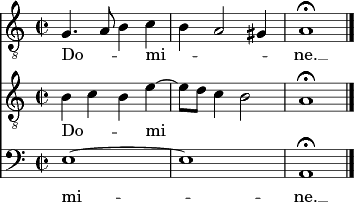

In [16]:
obrecht._score.measures(43,45).show()

With the traditional score at hand we can learn how to read the rest of the DataFrame. For example each whole number onset represents a quarter note (part 1, the B3 at onset 168.0 is followed by a C4 at onset 169.0). Thus a 0.5 indicates the use of an eighth note (as is noticable with D4 at onset 172.5 in part 1), and two 1.0 values, where the first item is assigned a note name while the second item is asigned a ```NaN``` value, indicates the use of a half note (as is observable with B3 at onsets 174.0 and 175.0 in part 1). 

## We now know how to index music into a pandas DataFrame, but what's next?

We need to farmiliarize ourselves with the different type of DataFrame manipulation tools that pandas offers. Here is a list of the tools, also known as [_indexers_](http://vis-framework.readthedocs.io/en/latest/py-modindex.html):

- ```'annotation'``` (```'lilypond.AnnotationIndexer'```)
- ```'active_voices'``` (```'active_voices.ActiveVoicesIndexer'```)
- ```'cadence'``` (```'cadence.CadenceIndexer'```)
- ```'contour'``` (```'contour.ContourIndexer'```)
- ```'dissonance'``` (```'dissonance.DissonanceIndexer'```)
- ```'fermata'``` (```'fermata.FermataIndexer'```)
- ```'horizontal_interval'``` (```'interval.HorizontalIntervalIndexer'```)
- ```'vertical_interval'``` (```'interval.IntervalIndexer'```)
- ```'duration'``` (```'meter.DurationIndexer'```)
- ```'measure'``` (```'meter.MeasureIndexer'```)
- ```'beat_strength'``` (```'meter.NoteBeatStrengthIndexer'```)
- ```'ngram'``` (```'ngram.NGramIndexer'```)
- ```'multistop'``` (```'noterest.MultiStopIndexer'```)
- ```'noterest'``` (```'noterest.NoteRestIndexer'```)
- ```'offset'``` (```'offset.FilterByOffsetIndexer'```)
- ```'over_bass'``` (```'over_bass.OverBassIndexer'```)
- ```'repeat'``` (```'repeat.FilterByRepeatIndexer'```)
- ```'windexer'``` (```'windexer.Windexer'```)

We have already used the ```'noterest'``` indexer above. Alternatively, we could have passed ```noterest.NoteRestIndexer``` to the ```get_data()``` method:

In [17]:
chant_indexed_alt = chant.get_data('noterest.NoteRestIndexer')

In [18]:
chant_indexed_alt.head(7).T

,,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Indexer,Parts,,,,,,,
noterest.NoteRestIndexer,0,C3,G2,A2,A2,E3,F3,E3


#### [2_Interval_Indexers.ipynb](2_Interval_Indexers.ipynb) >>

- [1_Getting_Started_with_VIS.ipynb](1_Getting_Started_with_VIS.ipynb)
- [2_Interval_Indexers.ipynb](2_Interval_Indexers.ipynb)
- [3_The_NGram_Indexer.ipynb](3_The_NGram_Indexer.ipynb)
- [4_Processing_Multiple_Files.ipynb]()
- [5_Data_Wrangling_Results.ipynb](5_Data_Wrangling_Results.ipynb)
- [6_Appendix.ipynb](6_Appendix.ipynb)